# Prediction on Injury and Severity of Aviation Accidents
## MA0218 Mini Project
### AY2022/23 MA9 Group 5

### Essential Library
Let's import the necessary library

In [1]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set  

<function seaborn.rcmod.set(*args, **kwargs)>

To ignore unnecessary warning , we will be importing the following library. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

### A glace at dataset
We import the dataset which is in csv format with `read_csv` from the pandas library.

In [3]:
avi_accident = pd.read_csv("AviationData.csv")
avi_accident

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/7/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/9/1996
2,20061025X01555,Accident,NYC07LA005,30/8/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/2/2007
3,20001218X45448,Accident,LAX96LA321,19/6/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,2/8/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/4/1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,2.02112E+13,Accident,GAA22WA054,21/12/2021,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87278,2.02112E+13,Accident,WPR22LA069,22/12/2021,"Auburn, CA",United States,NaN,NaN,NaN,NaN,...,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
87279,2.02112E+13,Accident,CEN22FA082,26/12/2021,"Hardy, AR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87280,2.02112E+13,Accident,ERA22LA097,29/12/2021,"Marathon, FL",United States,NaN,NaN,NaN,NaN,...,NaN,ExecAir,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN


Our dataset is from Kaggle: **"Aviation Accident Database & Synopses"** by *Kheiralllah Samaha*\
Source: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses \
Description of data available at https://www.ntsb.gov/_layouts/15/ntsb.aviation/AviationDownloadDataDictionary.aspx

> **Event.Id** : Unique Identification for Each Event.\
> **Investigation.Type** : Type of Event. \
> **Accident.Number** : NTSB Number. \
> **Event.Date** : The date of the event. Dates are be entered in the format: MM/DD/YYYY \
> **Location** : The city or place location closest to the site of the event. \
> **Country** :	The country in which the event took place.\
> **Latitude** : Event Location Latitude. \
> **Longitude** : Event Location Longitude. \
> **Airport.Code** : Airport code if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport. \
> **Airport.Name** : Airport name if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport. \
> **Injury.Severity** : Indicate the highest level of injury among all injuries sustained as a result of the event. \
> **Aircraft.damage** : Indicate the severity of damage to the accident aircraft. For the purposes of this variable, aircraft damage categories are defined in 49 CFR 830.2.\
> **Aircraft.Category** :The category of the involved aircraft. In this case, the definition of aircraft category is the same as that used with respect to the certification, ratings, privileges, and limitations of airmen. Also note that there is some overlap of category and class in the available choices.\
> **Registration.Number** : ll registration (tail) number of the involved aircraft, including the International Civil Aviation Organization (ICAO) country prefix. Note: the prefix for US registered aircraft is "N." \
> **Make** : Name of the manufacturer of the involved aircraft. \
> **Model** : Aircraft Model. \
> **Amateur.Built** : Aircraft is a homebuilt (Y/N). \
> **Number.of.Engines** : The total number of engines on the accident aircraft. \
> **Engine.Type** :	Type of engine(s) on the involved aircraft. \
> **FAR.Description** :	The applicable regulation part (14 CFR) or authority the aircraft was operating under at the time of the accident. \
> **Schedule** : Indicates whether an air carrier operation was scheduled or not. \
> **Purpose.of.flight** :Type of Flying (Per_Bus / Primary). \
> **Air.carrier** : Operator Name & Operator Is Doing Business As. \
> **Total.Fatal.Injuries** : Injury Total Fatal. \
> **Total.Serious.Injuries** : Injury Total Serious. \
> **Total.Minor.Injuries** : Injury Total Minor. \
> **Total.Uninjured** : Non-Injury Total. \
> **Weather.Condition** : Basic weather conditions. \
> **Broad.phase.of.flight** : All occurrences include information about the phase of flight in which the occurrence took place. Phase of flight refers to the point in the aircraft operation profile in which the event occurred. \
> **Report.Status** : The furthest level to which a report has been completed.\
> **Publication.Date** : The date on which the previous column was published to the web. \

Let's have an overview of the dataset by looking at the `type` and `shape` of the data.

In [4]:
print("Data type:\t", type(avi_accident))
print("Data dimension:\t", avi_accident.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dimension:	 (87282, 31)


Next, we will check the data type of each column by using `info`.

In [5]:
avi_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49322 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

***

## Data Preperation and Data Cleaning

##### Done by: Lee Min Xuan 

We will now prepare and clean up our dataset.

First, we will use `describe` to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min) , **first quartile** (denoted by 25%) , **median** (denoted by 50%) , **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the dataset. 

Note that this will only represents the overview for the column of the **numerical data**.

In [6]:
avi_accident.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81533.000000,75881.000000,74772.000000,75349.000000,81370.000000
mean,1.147131,0.652772,0.280921,0.360814,5.311847
std,0.447085,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We will only extract the data which are useful for analysis, which then comprised of 18 out of 31 columns in total and have a look at the data type of each column with `info`.

In [7]:
avi_acc = avi_accident[["Accident.Number", "Investigation.Type", "Event.Date", "Location", 
                       "Country",  "Injury.Severity" , "Aircraft.damage", "Make", 
                      "Amateur.Built", "Number.of.Engines", "Engine.Type", "Purpose.of.flight",  
                      "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries",
                      "Total.Uninjured", "Weather.Condition","Broad.phase.of.flight" 
                      ]]
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Event.Date              87282 non-null  object 
 3   Location                87230 non-null  object 
 4   Country                 87056 non-null  object 
 5   Injury.Severity         86399 non-null  object 
 6   Aircraft.damage         84272 non-null  object 
 7   Make                    87219 non-null  object 
 8   Amateur.Built           87180 non-null  object 
 9   Number.of.Engines       81533 non-null  float64
 10  Engine.Type             81391 non-null  object 
 11  Purpose.of.flight       81493 non-null  object 
 12  Total.Fatal.Injuries    75881 non-null  float64
 13  Total.Serious.Injuries  74772 non-null  float64
 14  Total.Minor.Injuries    75349 non-null

As there are 87282 rows and there are 87282 unique Accident Number, we can then ensure that all the datapoints are unique and no duplicated data in this dataset.

In [8]:
print("Total number of rows in dataset:\t", len(avi_acc))
print("Total number of unique Event ID:\t", len(avi_acc["Accident.Number"].unique()))

Total number of rows in dataset:	 87282
Total number of unique Event ID:	 87282


Now, we will check for NULL inputs and deal with them accordingly. 

In [9]:
avi_acc.isnull().sum()

Accident.Number               0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity             883
Aircraft.damage            3010
Make                         63
Amateur.Built               102
Number.of.Engines          5749
Engine.Type                5891
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

First, we want to clear the null values of  `Number.of.Engines`, `Total.Fatal.Injuries`, `Ttoal.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`. We wil first deal with the **numerical variables**, so let's know more about the measure of central tendancy. 

In [10]:
avi_acc[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", 
         "Number.of.Engines"]].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines
count,75881.000000,74772.000000,75349.000000,81370.000000,81533.000000
mean,0.652772,0.280921,0.360814,5.311847,1.147131
std,5.521338,1.557476,2.257721,27.899156,0.447085
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,349.000000,161.000000,380.000000,699.000000,8.000000


To have a clearer visualisation of the dataset distribution, we will use **Box Plot**, follow by **Histogram & KDE Plot**, lastly with **Violin PLot**.

We will first start with the **Box Plot** of `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`.

Text(0.5, 1.0, 'Number of Engines')

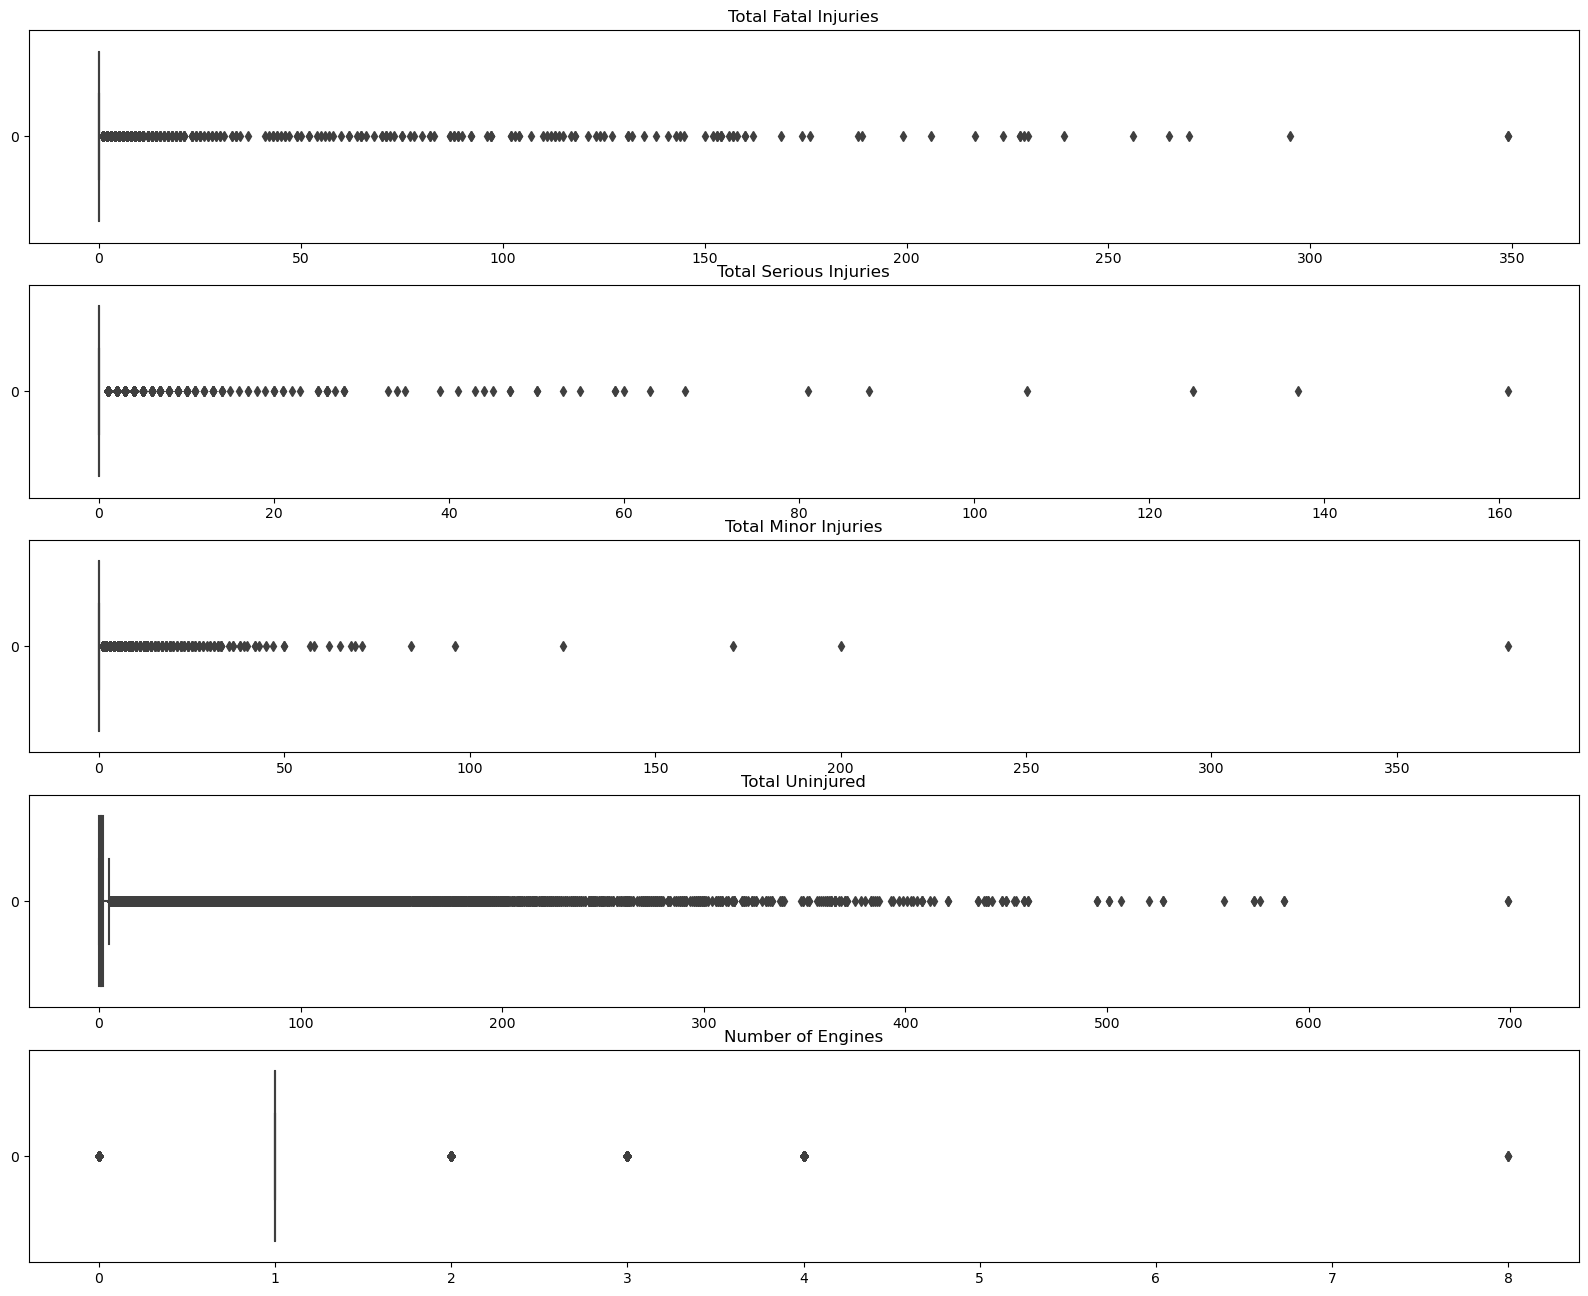

In [11]:
f, axes = plt.subplots(5,1, figsize = (20,16))

sb.boxplot(data = avi_acc["Total.Fatal.Injuries"], orient = "h", ax = axes[0]).set_title("Total Fatal Injuries")
sb.boxplot(data = avi_acc["Total.Serious.Injuries"], orient = "h", ax = axes[1]).set_title("Total Serious Injuries")
sb.boxplot(data = avi_acc["Total.Minor.Injuries"], orient = "h", ax = axes[2]).set_title("Total Minor Injuries")
sb.boxplot(data = avi_acc["Total.Uninjured"], orient = "h", ax = axes[3]).set_title("Total Uninjured")
sb.boxplot(data = avi_acc["Number.of.Engines"], orient = "h", ax = axes[4]).set_title("Number of Engines")

**Skewness**

Skewness is a measure of symmetry, which in turn tells us more about the distribution of the data.
- If the skewness is between **-0.5** and **0.5**, the data is fairly symmetrical.
- If the skewness is between **-1** and **-0.5** or between **0.5** and 1, the data is moderately skewed.
- If the skewness is less than **-1** or greater than **1**, the data is highly skewed.

From the skewness of each variable given below, 

In [12]:
Numdata = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"]
for i in Numdata:
    print("Skewness", i, "\t:", avi_acc[i].skew())

Skewness Total.Fatal.Injuries 	: 32.89339797950946
Skewness Total.Serious.Injuries 	: 49.159571419457386
Skewness Total.Minor.Injuries 	: 86.53335193063873
Skewness Total.Uninjured 	: 9.141805758957995
Skewness Number.of.Engines 	: 2.5727437956018897


Now, we will have a look at the **mean**, **median** and **mode** of each of the data. This will gives a summary of the centre point of the dataset.

In [13]:
for i in Numdata:
    print(i, "Mean:", round(avi_acc[i].mean(),2), "\t\tMedian:", avi_acc[i].median(), "\t\tMode:", avi_acc[i].mode(), "\n")

Total.Fatal.Injuries Mean: 0.65 		Median: 0.0 		Mode: 0    0.0
Name: Total.Fatal.Injuries, dtype: float64 

Total.Serious.Injuries Mean: 0.28 		Median: 0.0 		Mode: 0    0.0
Name: Total.Serious.Injuries, dtype: float64 

Total.Minor.Injuries Mean: 0.36 		Median: 0.0 		Mode: 0    0.0
Name: Total.Minor.Injuries, dtype: float64 

Total.Uninjured Mean: 5.31 		Median: 1.0 		Mode: 0    0.0
Name: Total.Uninjured, dtype: float64 

Number.of.Engines Mean: 1.15 		Median: 1.0 		Mode: 0    1.0
Name: Number.of.Engines, dtype: float64 



By looking at the skewness of the data, we can conclude that all `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured` and `Number.of.Engines` are positively skewed. 

Hence, we decided to use **median** to replace all the null values without changing the distribution of the data. This decision is supported by the fact that the values of median and mean are much similar as compared to mode for this highly skewed data.

Also, the variables `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured` and `Number.of.Engines` are usually in whole number. Hence, imputing the null value with mean (which is a decimal number) makes no sense. (Imagine we have 1.15 engine in an air vehicle or 0.28 Serious Injuries in an accident.)

In [14]:
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(missing_values = np.NaN, strategy = 'median')
avi_acc['Total.Fatal.Injuries']= imputer_median.fit_transform(avi_acc["Total.Fatal.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Serious.Injuries']= imputer_median.fit_transform(avi_acc["Total.Serious.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Minor.Injuries']= imputer_median.fit_transform(avi_acc["Total.Minor.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Uninjured']= imputer_median.fit_transform(avi_acc["Total.Uninjured"].values.reshape(-1,1))[:,0]
avi_acc['Number.of.Engines']= imputer_median.fit_transform(avi_acc["Number.of.Engines"].values.reshape(-1,1))[:,0]

Now,we will count the number of null data form each column of the cleaned data. Notice that we still have null values in the categorical variables, i.e. `Location`, `Country`, `Injury.Severity`, `Aircraft.damage`, `Make`, `Amateur.Built`, `Engine.Type`, `Purpose.of.flight`, `Weather.Condition` and `Broad.phase.of.flight`.

In [15]:
avi_acc.isnull().sum()

Accident.Number               0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity             883
Aircraft.damage            3010
Make                         63
Amateur.Built               102
Number.of.Engines             0
Engine.Type                5891
Purpose.of.flight          5789
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

Let's have a look at the distribution of the numerical variables after replacing with **median** by using a **boxplot** to visualise. Notice that the distribution remains the same.

Text(0.5, 1.0, 'Number of Engines')

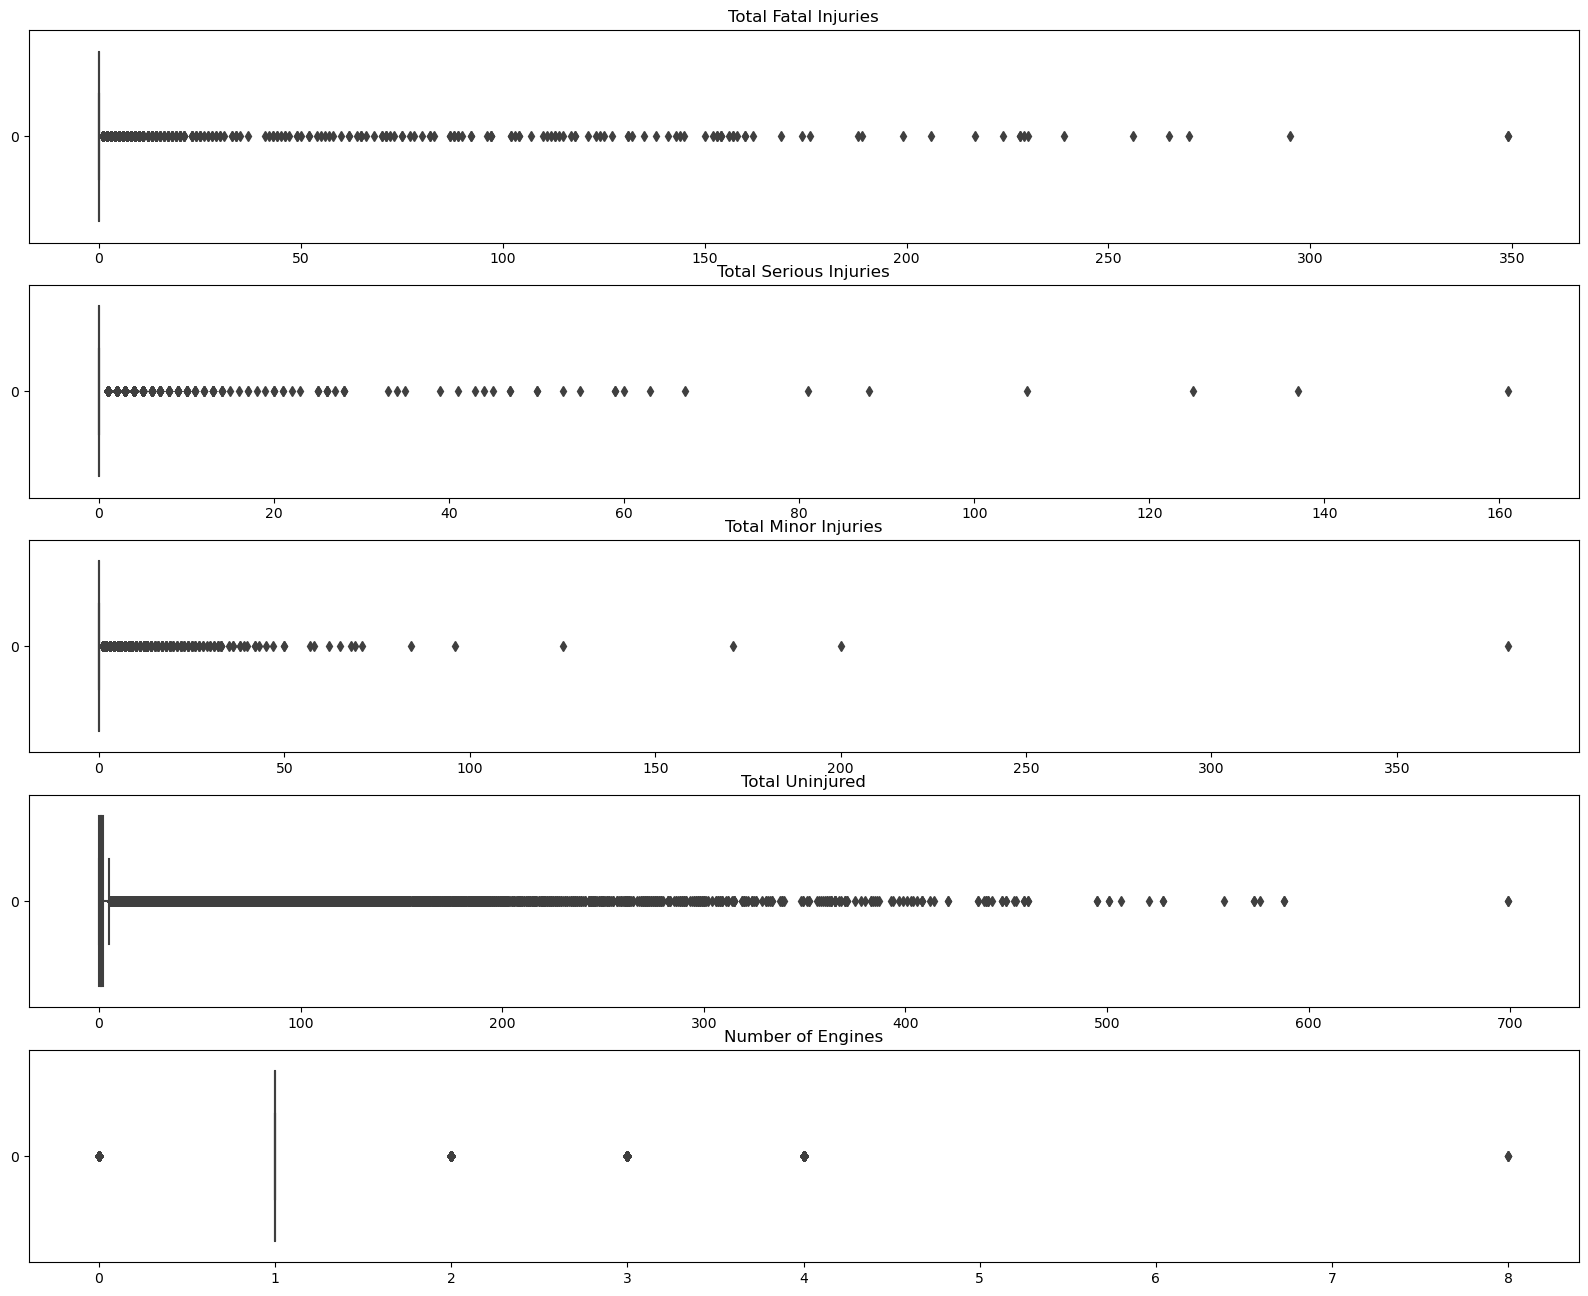

In [16]:
f, axes = plt.subplots(5,1, figsize = (20,16))

sb.boxplot(data = avi_acc["Total.Fatal.Injuries"], orient = "h", ax = axes[0]).set_title("Total Fatal Injuries")
sb.boxplot(data = avi_acc["Total.Serious.Injuries"], orient = "h", ax = axes[1]).set_title("Total Serious Injuries")
sb.boxplot(data = avi_acc["Total.Minor.Injuries"], orient = "h", ax = axes[2]).set_title("Total Minor Injuries")
sb.boxplot(data = avi_acc["Total.Uninjured"], orient = "h", ax = axes[3]).set_title("Total Uninjured")
sb.boxplot(data = avi_acc["Number.of.Engines"], orient = "h", ax = axes[4]).set_title("Number of Engines")

Now, we will deal with the null values which are non-numerical by filling **Unknown**.

As for `Weather.Condition`, we will replace the null values as **UNK**, which represents unknown in this column. 
As for `Injury.Severity`, we will replace the null value as **Unavailable**.

In [17]:
catdata = ["Location", "Country" , "Make", "Amateur.Built", "Engine.Type", "Purpose.of.flight", "Broad.phase.of.flight",
          "Aircraft.damage"]
for j in catdata:
    avi_acc[j].fillna(value = "Unknown", inplace = True)

avi_acc["Weather.Condition"].fillna(value = "UNK", inplace = True)
avi_acc["Injury.Severity"].fillna(value = "Unavailable", inplace = True)

Now, our data should not consists of any **NULL DATA** anymore.

In [18]:
avi_acc.isnull().sum()

Accident.Number           0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

Before proceding to the **Exploratory Data Analysis & Visualisation**, we will change the data types of each column.

Notice that the data type for each column wil be changed by now. We will check the data type of each column using `info` function.

In [19]:
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Event.Date              87282 non-null  object 
 3   Location                87282 non-null  object 
 4   Country                 87282 non-null  object 
 5   Injury.Severity         87282 non-null  object 
 6   Aircraft.damage         87282 non-null  object 
 7   Make                    87282 non-null  object 
 8   Amateur.Built           87282 non-null  object 
 9   Number.of.Engines       87282 non-null  float64
 10  Engine.Type             87282 non-null  object 
 11  Purpose.of.flight       87282 non-null  object 
 12  Total.Fatal.Injuries    87282 non-null  float64
 13  Total.Serious.Injuries  87282 non-null  float64
 14  Total.Minor.Injuries    87282 non-null

We will now look into each of the variables and do some suitable data cleaning before proceeding to **Exploratory Data Analysis and Visualisation**

## Data Cleaning (variables)

### Event Date 

We will now look into `Event.Date`. As we can see all of the data is in **dd/mm/yyyy** format. We decided to only extract data based on **years of occurance of event** to be further analysed during Exploratory Data Analysis and Visualisation later.

In [20]:
year_list = []
for i  in avi_acc["Event.Date"]:
    date_list = i.split("/")
    year = int(date_list[-1])
    year_list.append(year)
avi_acc["Event.Date"] = pd.DataFrame(year_list)
avi_acc.rename(columns={'Event.Date' : 'Event Year'}, inplace = True)

After regrouping the event date by years of event, we have 47 unique values. The number of data for each unique year event year is shown below.

In [21]:
print("Number of unique Event Year:\t", len(avi_acc["Event Year"].unique()))
avi_acc["Event Year"].value_counts()

Number of unique Event Year:	 47


1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1995    2309
1994    2257
1998    2226
2000    2220
1999    2209
1996    2187
1997    2148
2003    2085
2001    2063
2005    2031
2002    2020
2007    2016
2004    1952
2008    1893
2006    1851
2011    1850
2012    1835
2010    1786
2009    1783
2018    1681
2016    1664
2017    1638
2019    1624
2015    1582
2013    1561
2021    1544
2014    1535
2020    1392
1979       2
1948       1
1962       1
1981       1
1977       1
1974       1
2022       1
Name: Event Year, dtype: int64

### Injury and Severity

We will now look into `Injury.Severity`. As we can see there are 107 types of data in **Injury and Severity**.

In [22]:
print("Number of data in Injury.Severity:\t", len(avi_acc["Injury.Severity"].unique()))

Number of data in Injury.Severity:	 107


We will group all the **fatal** data together despite of the different number of deaths indicated behind. This will help us to reduce large set of unique categorical data under `Injury.Severity`. 

In [23]:
injury_list = []
for i in avi_acc["Injury.Severity"]:
    if i[0:5].lower() == "fatal":
        injury_list.append("Fatal")
    elif i == "Incident":
        injury_list.append("Incident")
    elif i == "Unavailable":
        injury_list.append("Unavailable")
    elif i == "Non-Fatal":
        injury_list.append("Non-Fatal") 
        
injury_df = pd.DataFrame(data = injury_list, columns = ["Injury"])
avi_acc["Injury.Severity"] = injury_df["Injury"]

After regrouping the **Injury.Severity**, we have 4 unique values. The number of each unique Injury and Severity is indicated below.

In [24]:
print("Number of unique Injury.Severity:\t", len(avi_acc["Injury.Severity"].unique()))
avi_acc["Injury.Severity"].value_counts()

Number of unique Injury.Severity:	 4


Non-Fatal      66561
Fatal          17523
Incident        2219
Unavailable      979
Name: Injury.Severity, dtype: int64

### Weather condition 

We will now look into `Weather.Condition`. We can notice that there are n types of Weather condition in this datatype.

In [25]:
print("Number of data in Weather.Condition:\t", len(avi_acc["Weather.Condition"].unique()))
avi_acc["Weather.Condition"].value_counts()

Number of data in Weather.Condition:	 4


VMC    76251
IMC     5944
UNK     4834
Unk      253
Name: Weather.Condition, dtype: int64

Notice that there are **Unk** and **UNK** which are both representing the similar Weather Condition, which is **Unknown**. We will rename both data as the same category.

We will also rename each of the weather condition to its full name for a better understanding. We will rename them according to the list below.  

We will now look into `Weather.Condition`. We can notice that there are n types of Weather condition in this datatype.

Notice that there are **Unk** and **UNK** which are both representing the similar Weather Condition, which is **Unknown**. We will rename both data as the same category.

We will also rename each of the weather condition to its full name for a better understanding. We will rename them according to the list below. 

| Previous | Current |
| :-----------| :---------- |
| UNK/Unk | Unknown |
| VMC | Visual Meteorological Conditions |
| IMC | Instrument Meterological Conditions |

where:

**VMC (Visual Meteorological Conditions)**: Visibility more than 5km, cloudbase 1500 ft. Pilots can sufficiently and safely maintain visuals of all other aircraft and the terrain around them.

**IMC (Instrument Meterological Conditions)**: Any conditions worse than VMC, pilots need to rely on instruments.

**Unk/UNK (Unknown)**: Weather condition unknown.

In [26]:
weather_list = []

for i in avi_acc["Weather.Condition"]:
    if i.upper() == "UNK":
        weather_list.append("Unknown")
    elif i == "VMC":
         weather_list.append("Visual Meteorological Conditions")
    else:
         weather_list.append("Instrument Meterological Conditions")
weather_df = pd.DataFrame(data = weather_list, columns = ["Weather"])
avi_acc["Weather.Condition"] = weather_df["Weather"]

After regrouping the **Weather.Condition**, we have 3 unique values. The number of each unique Weather.Condition is indicated below.

In [27]:
print("Number of unique Weather.Condition:\t", len(avi_acc["Weather.Condition"].unique()))
avi_acc["Weather.Condition"].value_counts()

Number of unique Weather.Condition:	 3


Visual Meteorological Conditions       76251
Instrument Meterological Conditions     5944
Unknown                                 5087
Name: Weather.Condition, dtype: int64

### Broad Phase of Flight 

We will now look into `Broad.phase.of.flight`. We can see that there are 12 types of Broad Phase of Flight. 

In [28]:
print("Types of Broad Phase of Flight:\t", len(avi_acc["Broad.phase.of.flight"].unique()))

Types of Broad Phase of Flight:	 12


We will clasify the broad phase of flight according to the table below.

| Previous | Current |
| :-----------| :---------- |
| Taxi/Standing | 1 |
| Takeoff/Landing | 2 |
| Climb/Descent/Approach/Go-around | 3 |
| Cruise/Maneuvering | 4 |
| Others | 0 |


In [29]:
broad_phase = []
for i in avi_acc["Broad.phase.of.flight"]:
    if i in ["Taxi","Standing"]:
        broad_phase.append(1)
    elif i in ["Takeoff","Landing"]:
        broad_phase.append(2)
    elif i in ["Climb","Descent","Approach","Go-around"]:
        broad_phase.append(3)
    elif i in ["Cruise","Maneuvering"]:
        broad_phase.append(4)
    else:
        broad_phase.append(0)
Broad_phase_of_flight_df = pd.DataFrame(data=broad_phase, columns = ["Broad phase of flight"])
avi_acc["Broad.phase.of.flight"] = Broad_phase_of_flight_df["Broad phase of flight"]

After regrouping the **Broad.phase.of.flight**, we have 5 unique values. The number of each unique Weather.Condition is indicated below.

In [30]:
print("Number of unique Broad.phase.of.flight:\t", len(avi_acc["Broad.phase.of.flight"].unique()))
avi_acc["Broad.phase.of.flight"].value_counts()

Number of unique Broad.phase.of.flight:	 5


2    27921
0    26225
4    18413
3    11820
1     2903
Name: Broad.phase.of.flight, dtype: int64

### Fatal Injury Rate

We define a new variable of our concern known as **Fatal Injury Rate**. The **Fatal Injury Rate** is processed by using the formula stated below.

$\frac{Total.Fatal.Injuries} {Total.Fatal.Injuries+Total.Serious.Injuries+Total.Minor.Injuries+Total.Uninjured}*100\%$

In [31]:
rate_list = []
count = 0
fatal_list = avi_acc["Total.Fatal.Injuries"].tolist()
serious_list = avi_acc["Total.Serious.Injuries"].tolist()
minor_list = avi_acc["Total.Minor.Injuries"].tolist()
no_list = avi_acc["Total.Uninjured"].tolist()

for i in range(0,len(avi_acc)):
    try:
        rate = round(((fatal_list[i])/(fatal_list[i]+serious_list[i]+minor_list[i]+no_list[i])*100),2)
    except: #fatal_list[i] = serious_list[i] = minor_list[i] = no_list[i] = 0
        rate = 0
    rate_list.append(rate)
rate_df = pd.DataFrame(rate_list)
avi_acc["Fatal.rate"] = rate_df
avi_acc

,Accident.Number,Investigation.Type,Event Year,Location,Country,Injury.Severity,Aircraft.damage,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Fatal.rate
0,SEA87LA080,Accident,1948,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,4,100.00
1,LAX94LA336,Accident,1962,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,0,100.00
2,NYC07LA005,Accident,1974,"Saltville, VA",United States,Fatal,Destroyed,Cessna,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Instrument Meterological Conditions,4,75.00
3,LAX96LA321,Accident,1977,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Instrument Meterological Conditions,4,100.00
4,CHI79FA064,Accident,1979,"Canton, OH",United States,Fatal,Destroyed,Cessna,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,Visual Meteorological Conditions,3,33.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,GAA22WA054,Accident,2021,"Auxerre, OF",United States,Fatal,Destroyed,CIRRUS DESIGN CORP,N,1.0,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,0,100.00
87278,WPR22LA069,Accident,2021,"Auburn, CA",United States,Non-Fatal,Unknown,CESSNA,N,1.0,Unknown,Positioning,0.0,0.0,1.0,0.0,Unknown,0,0.00
87279,CEN22FA082,Accident,2021,"Hardy, AR",United States,Fatal,Unknown,CESSNA,N,1.0,Unknown,Personal,2.0,0.0,0.0,0.0,Unknown,0,100.00
87280,ERA22LA097,Accident,2021,"Marathon, FL",United States,Non-Fatal,Unknown,CESSNA,N,1.0,Unknown,Unknown,0.0,3.0,0.0,0.0,Unknown,0,0.00


### Number of plane

Let's us now look at the variable `Accident.Number`.
If there is presence of character **A or B or C** at the back of the serial number, it shows that this incident involves more than one plane.

In [32]:
sp2df = avi_acc.copy()
list1 = []
list2 = []
final_list = []

for i in sp2df["Accident.Number"]:
    if i[-1] in ["A","B","C"]:
        list1.append(i)
list1.sort()

for k in sp2df["Accident.Number"]:
    if k[-1] in "C":
        list2.append(k[0:-1])
        
for j in sp2df["Accident.Number"]:
    if j not in list1:
        final_list.append(1)
    elif j[0:-1] in list2:
        final_list.append(3)
    else:
        final_list.append(2)
        
avi_acc["Number of plane involved"] = final_list

Notice that the number of plane involved in aviation accident is now extracted out from the `accident number` dataset.

In [33]:
avi_acc["Number of plane involved"].value_counts()

1    85459
2     1817
3        6
Name: Number of plane involved, dtype: int64

### Make 

Notice that some of the data are seperated into two different groups despite being the same **Make** category, for example Boeing and BOEING, Piper and PIPER. Hence, some of the data cleaning is required to clean up the data for better Exploratory Data Analysis and Visualisation. 

In [34]:
print("Total number of unique MAKE data:\t", len(avi_acc["Make"].unique()))
avi_acc["Make"].value_counts()

Total number of unique MAKE data:	 8045


Cessna                   22227
Piper                    12029
CESSNA                    4549
Beech                     4329
PIPER                     2618
                         ...  
Harwell/gardner              1
Galaxy Balloons, Inc.        1
Moseler                      1
University Of Alabama        1
CAMERON BALLOONS U S         1
Name: Make, Length: 8045, dtype: int64

To make sure there is no error in categorical data, we will rename all the `Make` data to become upper case and replace the original data.  

In [35]:
make_list = []
for i in avi_acc["Make"]:
    make_list.append(i.upper())
avi_acc["Make"] = make_list

Notice that after cleaning the number of unique MAKE data reduce from 8406 to 7409.

In [36]:
print("Total number of unique MAKE data after cleaning:\t", len(avi_acc["Make"].unique()))
avi_acc["Make"].value_counts()

Total number of unique MAKE data after cleaning:	 7408


CESSNA                  26776
PIPER                   14647
BEECH                    5305
BELL                     2672
BOEING                   2648
                        ...  
ARNET PEREYRA AERO          1
WILLIAM JOHN SCHULZ         1
WILLIAM JAY KINNEY          1
HAERING AVID FLYER          1
CAMERON BALLOONS U S        1
Name: Make, Length: 7408, dtype: int64

### Amateur Built

Notice that for **Amateur Built**, the categorical data are divided into **Yes**, **Y**, **No**, **N** and **NotDefined**. The categorical variables seem to be reduntant of each other. Hence, we will work on grouping the data of the same type together.

| Previous | Current |
| :-----------| :---------- |
| Yes/Y | Yes |
| No/N | No |
| Unknown | Unknown |

In [37]:
print("Number of unique data of Amateur Built:\t", len(avi_acc["Amateur.Built"].unique()))
avi_acc["Amateur.Built"].value_counts()

Number of unique data of Amateur Built:	 5


No         58165
N          20661
Yes         5646
Y           2708
Unknown      102
Name: Amateur.Built, dtype: int64

In [38]:
ama_list = []
for i in avi_acc["Amateur.Built"]:
    if i in ["No", "N"]:
        ama_list.append("No")
    elif i in ["Yes", "Y"]:
        ama_list.append("Yes")
    else:
        ama_list.append("Unknown")
avi_acc["Amateur.Built"] = ama_list

Notice that the unique data of Amateur Built has reduced to **3 types** from **5 types**.   

In [39]:
print("Number of unique data of Amateur Built:\t", len(avi_acc["Amateur.Built"].unique()))
avi_acc["Amateur.Built"].value_counts()

Number of unique data of Amateur Built:	 3


No         78826
Yes         8354
Unknown      102
Name: Amateur.Built, dtype: int64

### Change of data types

We will now manipulate the data types to fascilitate **Exploratory Data Analysis & Visualisation** and reduce the memory for a better coding runtime. 

In [40]:
def convert_category(data, *args):
    for k in args:
        data[k] = data[k].astype("category")

def convert_float32(data, *args):
    for k in args:
        data[k] = data[k].astype("float32")
        
convert_category(avi_acc, ["Accident.Number", "Investigation.Type", "Location", "Country", "Injury.Severity", 
                         "Aircraft.damage",  "Make", "Amateur.Built", "Engine.Type", "Purpose.of.flight", 
                        "Weather.Condition", "Broad.phase.of.flight", "Event Year"])
convert_float32(avi_acc, ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured",
                          "Fatal.rate", "Number of plane involved", "Number.of.Engines"])

In [41]:
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Accident.Number           87282 non-null  category
 1   Investigation.Type        87282 non-null  category
 2   Event Year                87282 non-null  category
 3   Location                  87282 non-null  category
 4   Country                   87282 non-null  category
 5   Injury.Severity           87282 non-null  category
 6   Aircraft.damage           87282 non-null  category
 7   Make                      87282 non-null  category
 8   Amateur.Built             87282 non-null  category
 9   Number.of.Engines         87282 non-null  float32 
 10  Engine.Type               87282 non-null  category
 11  Purpose.of.flight         87282 non-null  category
 12  Total.Fatal.Injuries      87282 non-null  float32 
 13  Total.Serious.Injuries    87282 non-null  floa

In [42]:
avi_acc.isnull().sum()

Accident.Number             0
Investigation.Type          0
Event Year                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage             0
Make                        0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
Fatal.rate                  0
Number of plane involved    0
dtype: int64

We will now export the modified csv file. 

In [43]:
avi_acc.to_csv('Cleaned Aviation Data.csv')